### Exercise 1: Gaussian Filter

##### Apply a 2d gaussain filter, both with separability and with a 2d kernel

In [2]:
# Import needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time # To compute timings 

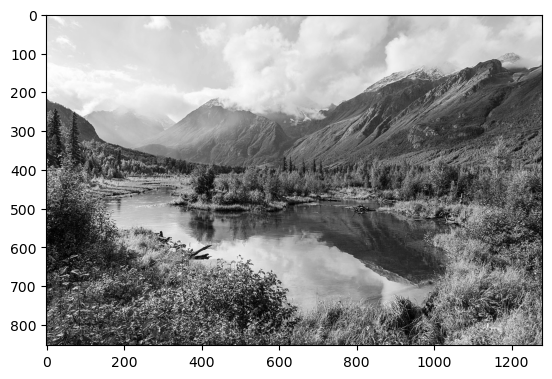

In [6]:
# Read the image to analyze
img = cv2.imread('landscape.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap = 'gray', vmin = 0, vmax=255)
plt.show()

In [7]:
# Consider a sigma equal to 1.5
sigma = 1.5
kernel_size = int(np.ceil((3*sigma))*2+1) # Rule-of-thumb applied, 
                                          # in order to get a Gaussian approximation 
                                          # of the kernel size given sigma
print(f'Sigma: {sigma}, Kernel size: {kernel_size}')

Sigma: 1.5, Kernel size: 11


Time needed twice 1D:  0.002452373504638672


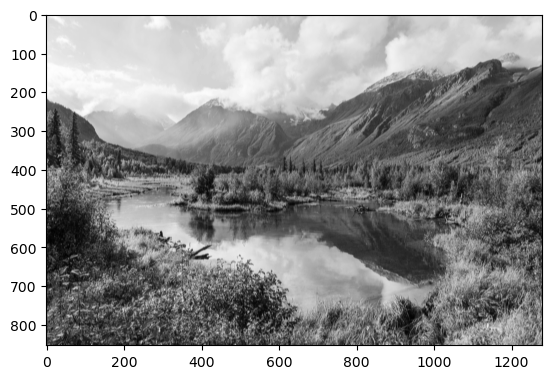

In [13]:
# Two 1D kernels 11x11, exploiting separability
gaussian_k_1D = cv2.getGaussianKernel(kernel_size, sigma) # Finding the kernel
start = time.time()
image_1d_ker = cv2.filter2D(img, -1, gaussian_k_1D) # Applying the kernel

print('Time needed twice 1D: ', time.time() - start) #It varies every time the cell is run

plt.imshow(image_1d_ker, cmap = 'gray', vmin = 0, vmax = 255)
plt.show()

Time needed single 2D (SLOWER):  0.0262606143951416


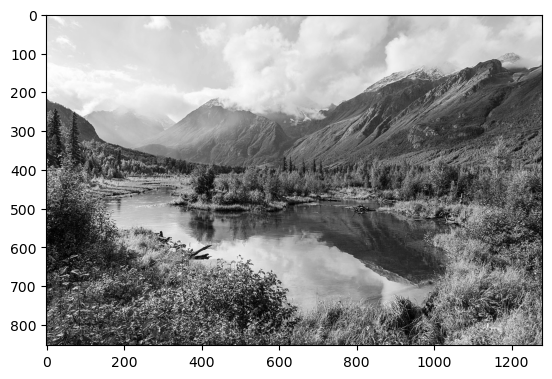

In [15]:
# 2D kernel

gaussian_k_2D = gaussian_k_1D.dot(gaussian_k_1D.transpose())    # Finding the kernel
start = time.time()
image_2d_ker = cv2.filter2D(img, -1, gaussian_k_2D) #Applying the kernel

print("Time needed single 2D (SLOWER): ", time.time()-start)

plt.imshow(img,cmap='gray',vmin=0,vmax=255) # Plotting the results
plt.show()

Time needed with OpenCV API (Best Optimization):  0.0011556148529052734


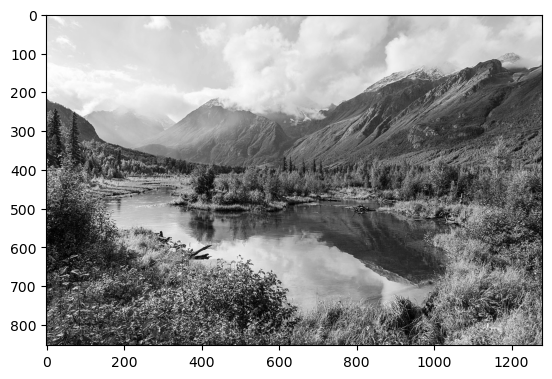

In [18]:
# Using OpenCV function cv2.GaussianBlur()

start = time.time()
img_cv2_func = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)

print("Time needed with OpenCV API (Best Optimization): ", time.time()-start)

plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show() #Plotting the results

### Exercise 2: Bilateral Filter

##### Apply a bilateral filter with filter size of 9x9 and both sigma values of 75.

The Bilateral filter uses a Gaussian filter in the **space** domain, and it also uses a Gaussian filter component which is a function of pixel intensity differences: 
* Gaussian filter makes sure that only pixels that are 'spatial neighbors' are considered for filtering;
* (multiplicative) Gaussian-filter component ensures that only pixel with intensity similar to the central pixel are considered ('intensity neighbors').

__N.B__:
* Sigma values: If they are small (< 10), the filter will not have much effect, whereas if they are large (> 150), they will have a very strong effect, making the image look “cartoonish”.
* Filter size: Large filters (> 5) are very slow, so it is recommended to use d=5 for real-time applications, and approximately 9 for offline applications that need heavy noise filtering.

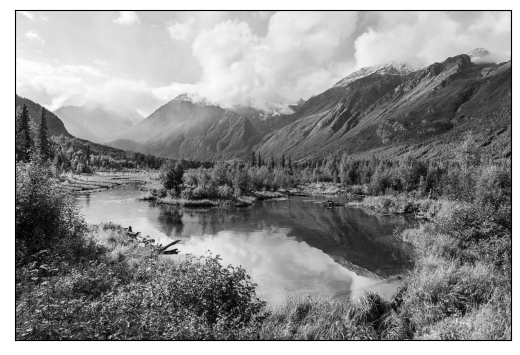

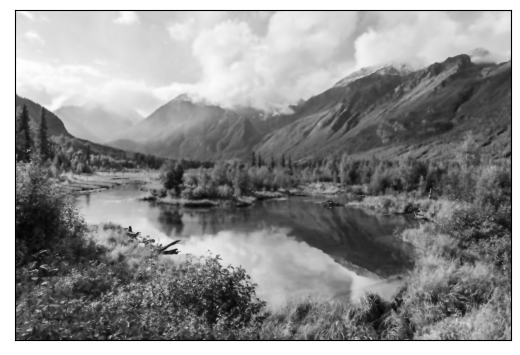

In [49]:
# Read the image
img = cv2.imread('landscape.jpg', cv2.IMREAD_GRAYSCALE)
#plt.subplot(121)
plt.imshow(img, cmap='gray', vmin=0, vmax=255), plt.xticks([]), plt.yticks([])
plt.show()

filter_size = 9

denoised = cv2.bilateralFilter(img, filter_size, 75, 75)
#plt.subplot(122)
plt.imshow(denoised, cmap='gray', vmin=0,vmax=255), plt.xticks([]), plt.yticks([])
plt.show()

### Sobel Filter

##### Apply the Sobel kernels to calculate the smooth derivatives $\frac{dI(x, y)}{dx}$, $\frac{dI(x, y)}{dy}$ along x and y respectively. Visualize the absolute value of the two results.

Then, calculate the module of the gradient as $max(abs(\frac{dI(x, y)}{dx}), abs(\frac{dI(x, y)}{dy}))$ and visualize also this last result.

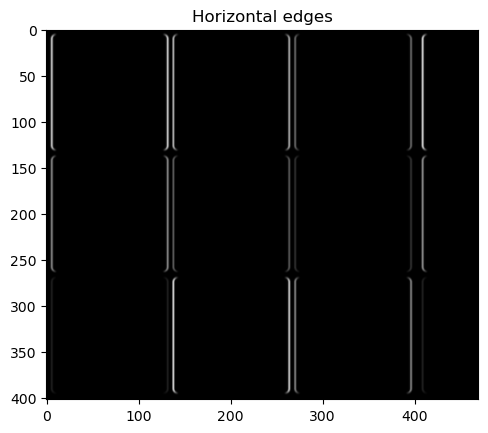

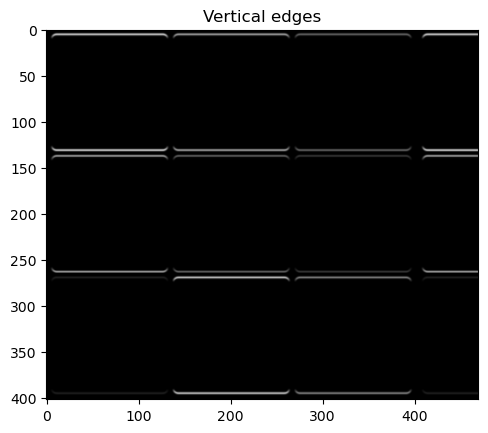

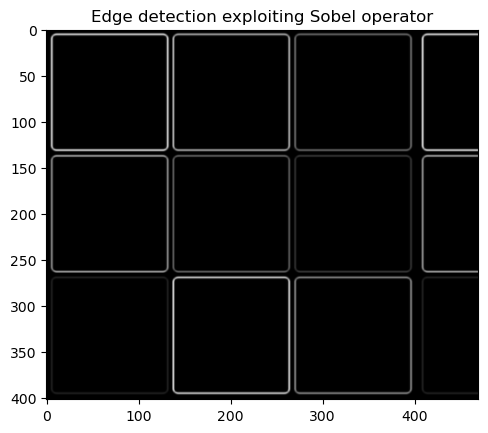

In [56]:
img = cv2.imread('squares.png', cv2.IMREAD_GRAYSCALE)

# Define Sobel kernels

# Horizontal changes
sobel_kernel_x = np.array([
            [-1,0,1],
            [-2,0,2],
            [-1,0,1]])*1/4

# Vertical changes
sobel_kernel_y = np.array([
            [-1,-2,-1],
            [0,0,0],
            [1,2,1]])*1/4

# dI(x, y)/dx
dx = cv2.filter2D(img.astype(float),-1,sobel_kernel_x)
dx = np.abs(dx)
plt.title('Horizontal edges')
plt.imshow(dx,cmap='gray',vmin=0,vmax=255)
plt.show()

# dI(x, y)/dy
dy = cv2.filter2D(img.astype(float), -1, sobel_kernel_y)
dy = np.abs(dy)
plt.title('Vertical edges')
plt.imshow(dy, cmap='gray', vmin=0, vmax=255)
plt.show()

# Finding gradient module pixel-wise
# NMS 
sobel = np.maximum(dx,dy)   

# Show the edge detection 
plt.title('Edge detection exploiting Sobel operator')
plt.imshow(sobel, cmap='gray', vmin=0, vmax=255)
plt.show()
